In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Read the train data
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [3]:
df = df_train.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22148 entries, 0 to 22147
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     22148 non-null  int64  
 1   horse_number           22148 non-null  float64
 2   horse_name             22148 non-null  object 
 3   horse_id               22148 non-null  object 
 4   jockey                 22148 non-null  object 
 5   trainer                22148 non-null  object 
 6   actual_weight          22148 non-null  int64  
 7   declared_horse_weight  22148 non-null  int64  
 8   draw                   22148 non-null  int64  
 9   length_behind_winner   20250 non-null  object 
 10  running_position_1     22148 non-null  float64
 11  running_position_2     22148 non-null  float64
 12  running_position_3     22148 non-null  float64
 13  running_position_4     12246 non-null  float64
 14  finish_time            22148 non-null  object 
 15  wi

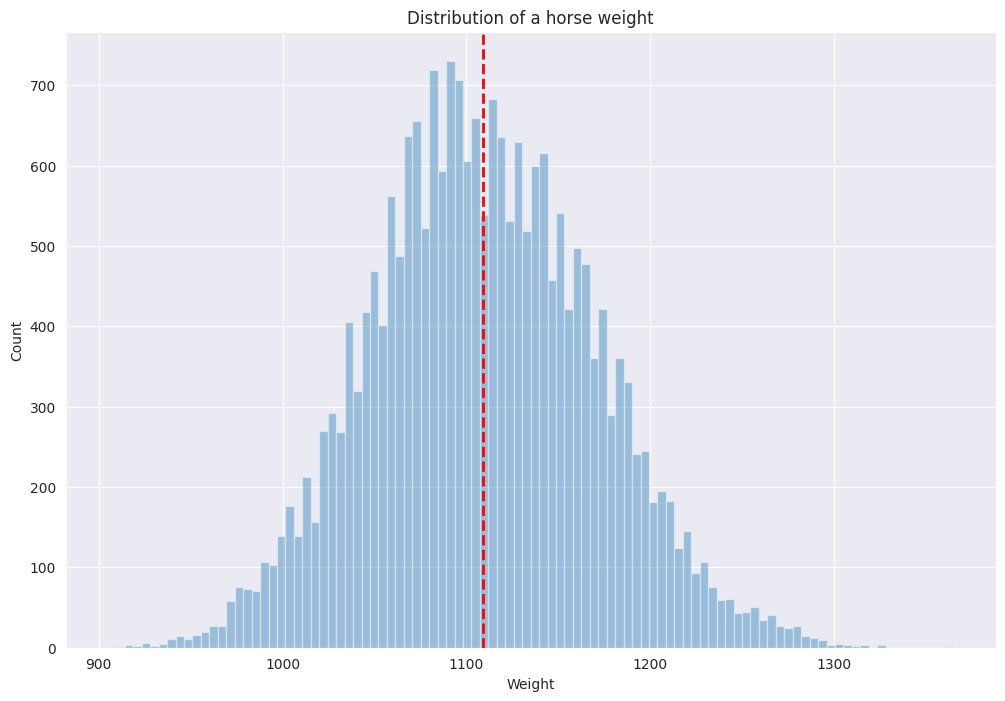

In [5]:
# Draw the mean of a horse weight on same plot
plt.figure(figsize=(12, 8))
sns.distplot(df['declared_horse_weight'], bins=100, kde=False)
plt.title("Distribution of a horse weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.axvline(df['declared_horse_weight'].mean(), color='r', linestyle='dashed', linewidth=2)

plt.show()

Text(0.5, 1.0, 'Distribution of Number of Horses per Race')

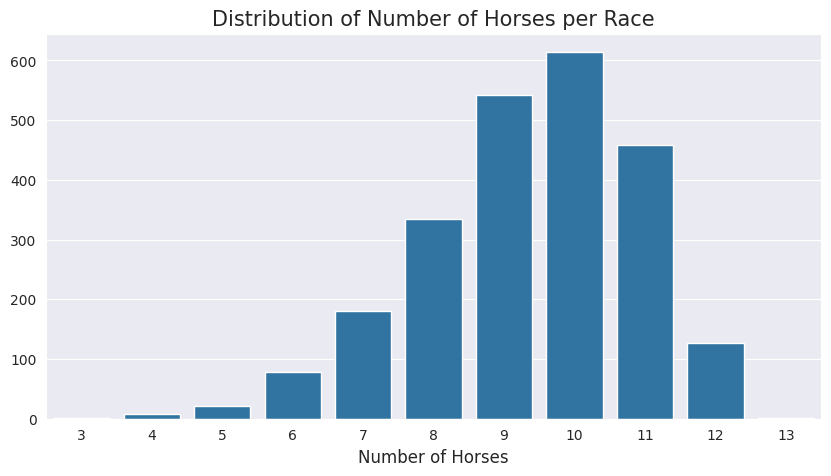

In [6]:
# Find the number of horses each race
numHorsePerRace = df.groupby('race_id')['horse_id'].count().value_counts()
# Plot the distribution of the number of horses
plt.figure(figsize=(10, 5))
sns.barplot(x=numHorsePerRace.index, y=numHorsePerRace.values)
plt.xlabel('Number of Horses', fontsize=12)
plt.ylabel

# Set title
plt.title('Distribution of Number of Horses per Race', fontsize=15)

Text(0.5, 1.0, 'Distribution of Actual Weight')

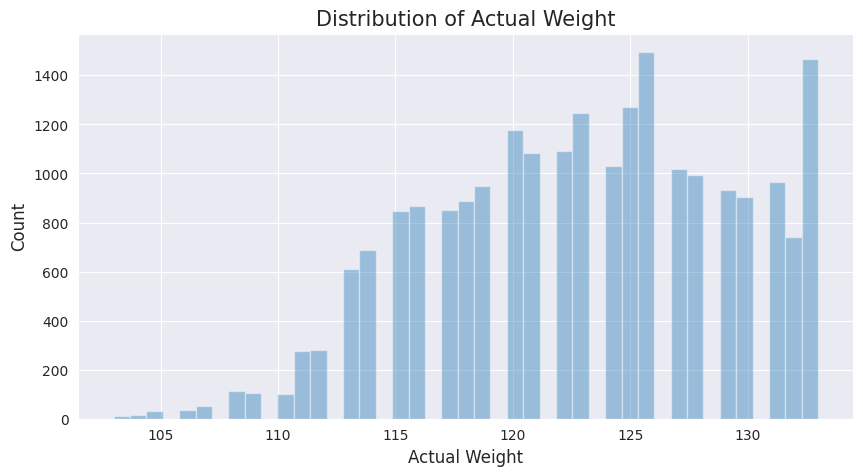

In [7]:
# Plot the distribution of actual weight
plt.figure(figsize=(10, 5))
sns.distplot(df['actual_weight'], kde=False)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Actual Weight', fontsize=15)

Text(0.5, 1.0, 'Recent Average Rank vs Win Odds')

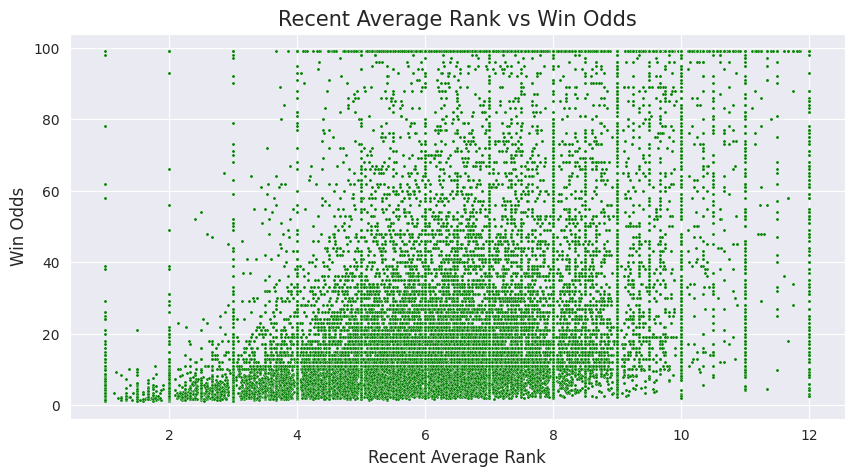

In [8]:
# plot recent average rank against win_odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='recent_ave_rank', y='win_odds', data=df, s=5, color='g')
plt.xlabel('Recent Average Rank', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Recent Average Rank vs Win Odds', fontsize=15)


Text(0.5, 1.0, 'Mean Win Odds against Finishing Position')

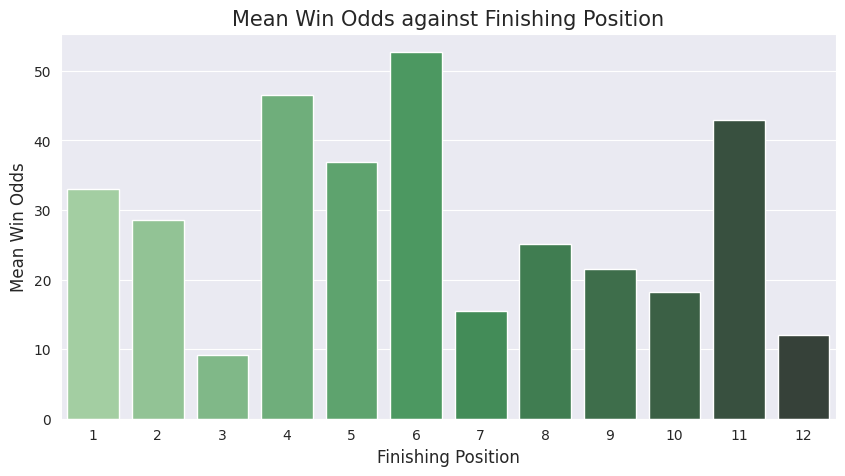

In [9]:
# Plot mean of win odds against finishings
plt.figure(figsize=(10, 5))
sns.barplot(x=df['finishing_position'].unique(), y=df.groupby('finishing_position')['win_odds'].mean(), palette='Greens_d')
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Win Odds', fontsize=12)
plt.title('Mean Win Odds against Finishing Position', fontsize=15)

Text(0.5, 1.0, 'Distribution of Actual Weight against Win Odds')

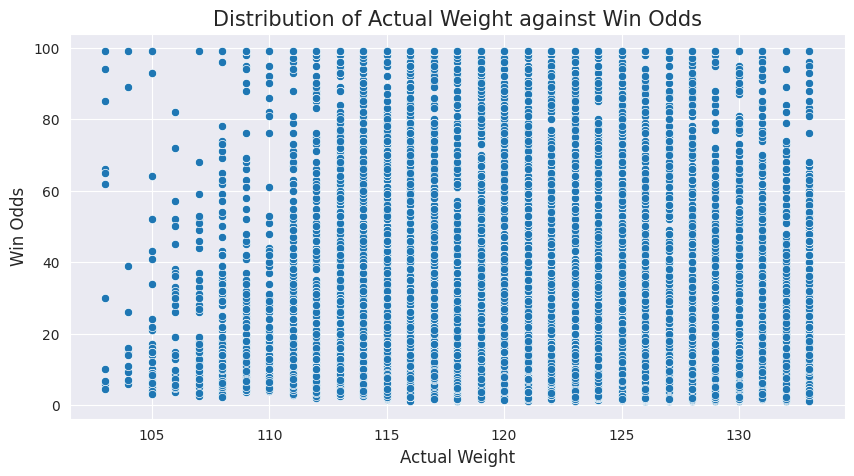

In [10]:
# Plot distribution of actual weight against win odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='win_odds', data=df)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Distribution of Actual Weight against Win Odds', fontsize=15)

Text(0.5, 1.0, 'Distribution of Actual Weight against Horse Number')

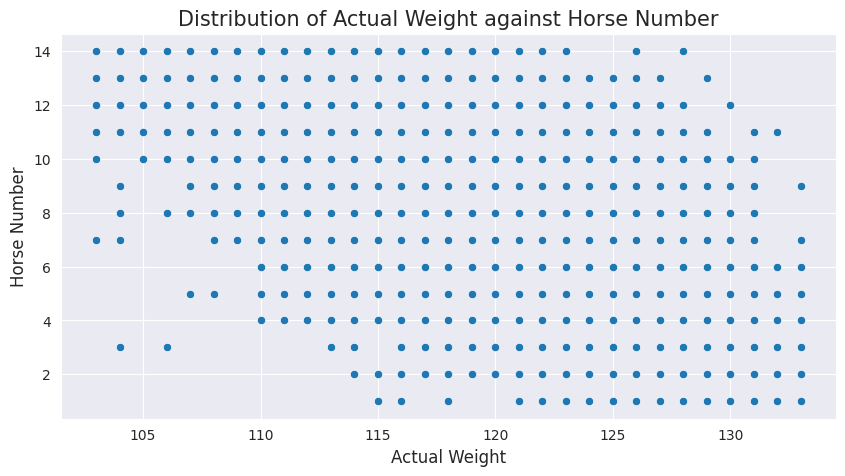

In [11]:
# Plot distribution of actual weight against horse number
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='horse_number', data=df)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Horse Number', fontsize=12)
plt.title('Distribution of Actual Weight against Horse Number', fontsize=15)

Hong Kong horse racing uses the handicap system. Horse number #1 has the highest rating and carry the heaviest weight.

Text(0.5, 1.0, 'Distribution of Mean Actual Weight for Each Horse Number')

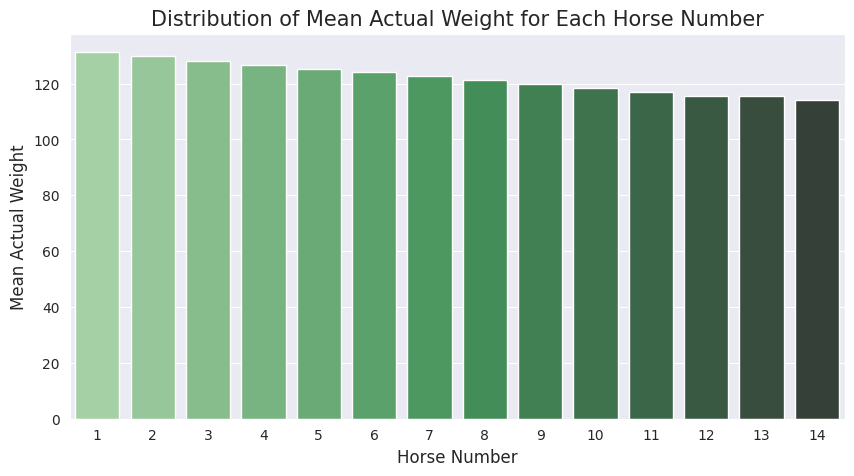

In [12]:
# Find the mean of actual weight for each horse number
meanWtPerHorse = df.groupby('horse_number')['actual_weight'].mean()

# Plot the distribution of mean actual weight for each horse number
plt.figure(figsize=(10, 5))
sns.barplot(x=meanWtPerHorse.index.astype(int), y=meanWtPerHorse.values, palette='Greens_d')
plt.xlabel('Horse Number', fontsize=12)
plt.ylabel('Mean Actual Weight', fontsize=12)
plt.title('Distribution of Mean Actual Weight for Each Horse Number', fontsize=15)

Text(0.5, 1.0, 'Distribution of Finishing Position against Draw')

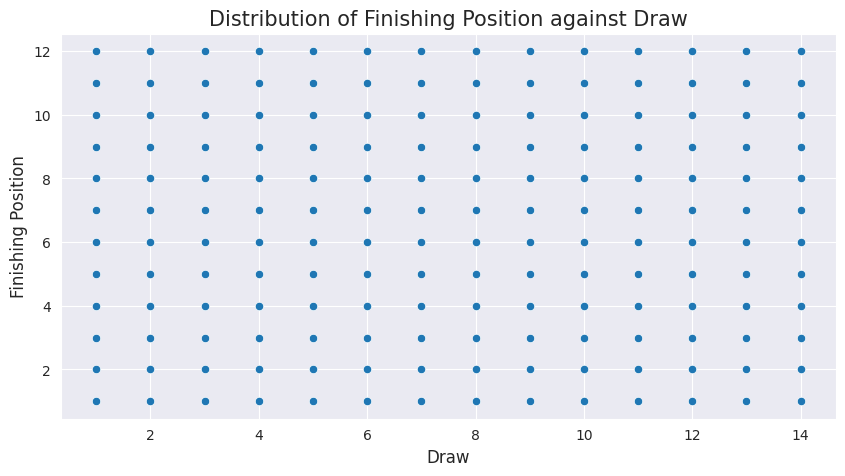

In [13]:
# Plot the distribution of finishing position against draw
plt.figure(figsize=(10, 5))
sns.scatterplot(x='draw', y='finishing_position', data=df)
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.title('Distribution of Finishing Position against Draw', fontsize=15)

The gate number for each horse is drawn 2 days before the races. Gate number 1 is the closest to the inside rail. Thus, we would expect better performance for horses with lower draw number.

Text(0.5, 1.0, 'Distribution of Average Finishing Position against Draw')

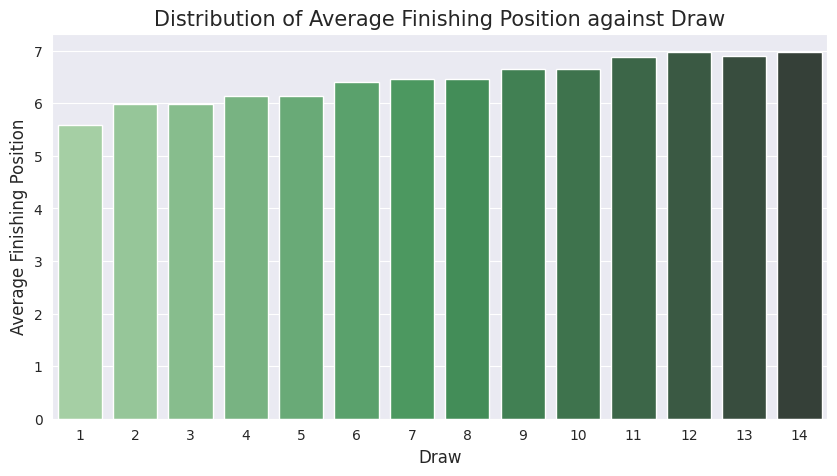

In [14]:
# Return only 14 columns. Draw #15 is not included.
avgPos_vs_Draw = df.groupby('draw')['finishing_position'].mean()[:14]

# Plot the distribution of average finishing position against draw
plt.figure(figsize=(10, 5))
sns.barplot(x=avgPos_vs_Draw.index, y=avgPos_vs_Draw.values, palette='Greens_d')
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.title('Distribution of Average Finishing Position against Draw', fontsize=15)

(1070.0, 1120.0)

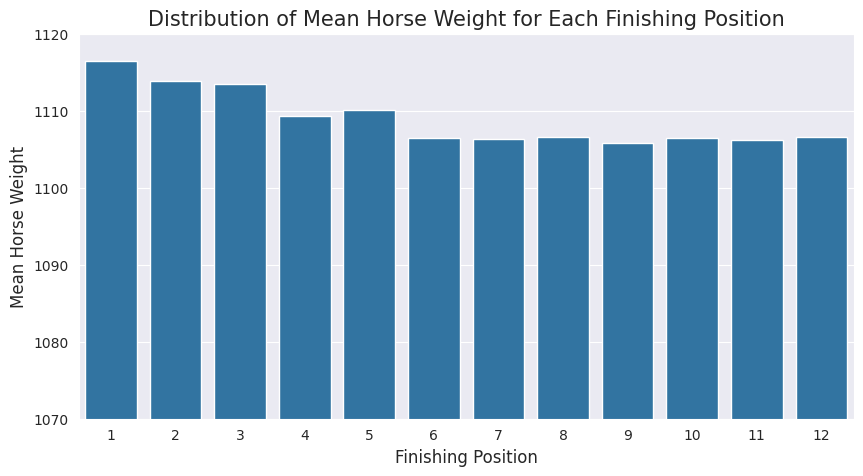

In [15]:
# Find the mean of horse weight for each position
meanHorseWtPerPos = df.groupby('finishing_position')['declared_horse_weight'].mean()

# Plot the distribution of mean horse weight for each position
plt.figure(figsize=(10, 5))
sns.barplot(x=meanHorseWtPerPos.index, y=meanHorseWtPerPos.values)
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Horse Weight', fontsize=12)
plt.title('Distribution of Mean Horse Weight for Each Finishing Position', fontsize=15)

# Set y limit
plt.ylim(1070, 1120)

Not conclusive to say that there is a relationship between horse weight and finishing position.

In [16]:
df.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,sectional_time,incident_report,Season,recent_6_runs,recent_ave_rank,jockey_ave_rank,race_course_id,track_id,season_id,track_condition_id
0,3,10.0,PACKING DRAGON,T230,M Barzalona,P F Yiu,117,1202,12,HD,...,13.54 22.42 23.51 24.95 24.54,\n MCQUEEN began awkwardly.\nBA...,Winter,3/1/1/3/3/1,3.75,5.111111,1,4,2,2
1,3,3.0,BEST HOPE,S102,N Callan,C H Yip,129,1100,12,1-3/4,...,27.75 23.56 24.14 23.81,"\n On arrival at the Start, K T...",Spring,3/2/4/8/8,5.00,6.066800,1,4,1,2
2,12,12.0,MEGA CHAMPION,M149,K C Leung,A S Cruz,115,1051,6,5,...,13.28 21.84 23.84 23.20,"\n Approaching the 800 Metres, ...",Autumn,12,12.00,6.729087,0,1,3,2
3,7,8.0,ALL THE BEST,S169,O Doleuze,R Gibson,122,1115,6,3-1/4,...,23.80 23.69 22.93,\n FIVE UP HIGH and ALL WIN BOY...,Winter,7,7.00,6.394839,1,4,2,1
4,10,14.0,INTELLECTUAL GLIDE,S124,K C Leung,Y S Tsui,116,962,10,8-3/4,...,25.17 22.88 23.75 23.55,\n BLISS CARTEL and HOLY MAC we...,Summer,10/11/7/7/12/10,9.60,6.729087,0,7,4,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'finishing_position'),
  Text(1.5, 0, 'actual_weight'),
  Text(2.5, 0, 'declared_horse_weight'),
  Text(3.5, 0, 'draw'),
  Text(4.5, 0, 'recent_ave_rank'),
  Text(5.5, 0, 'jockey_ave_rank'),
  Text(6.5, 0, 'race_distance')])

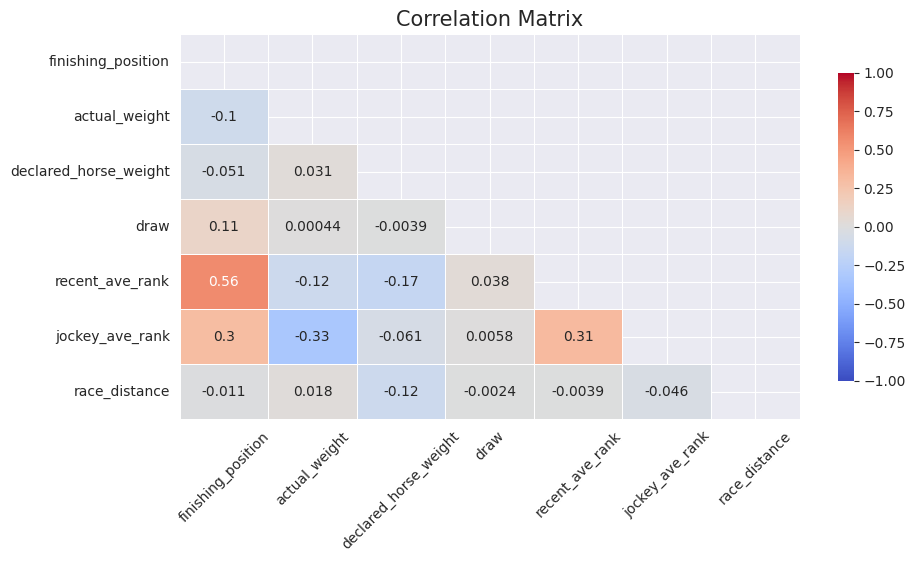

In [19]:
# keep only features we want
cols = ['finishing_position', 'actual_weight', 'declared_horse_weight', 'draw', 'recent_ave_rank',
        'jockey_ave_rank', 'race_distance']

# view the correlation matrix
corr = df[cols].corr()

# do a mask to hide the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 5))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
            center=0, square=False, linewidths=.5,
            cbar_kws={"shrink": .8}, annot=True)
plt.title('Correlation Matrix', fontsize=15)

# rotate the ticklabels for easier reading
plt.xticks(rotation=45)


In [27]:
# Find out how many horses are there
print('Number of horses: ', len(df['horse_id'].unique()))

Number of horses:  2069


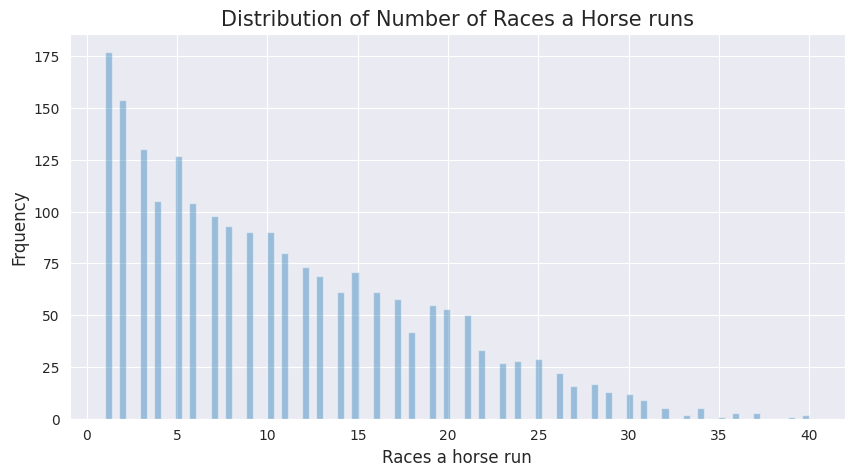

In [29]:
# Find the frequency of each horse
horseFreq = df['horse_id'].value_counts()

# Plot the distribution of horse frequency
plt.figure(figsize=(10, 5))
sns.distplot(horseFreq, kde=False, bins=100)
plt.xlabel('Races a horse run', fontsize=12)
plt.ylabel('Frquency', fontsize=12)
plt.title('Distribution of Number of Races a Horse runs', fontsize=15);


Text(0.5, 1.0, 'Distribution of Recent Average Rank of Horse against Finishing Position')

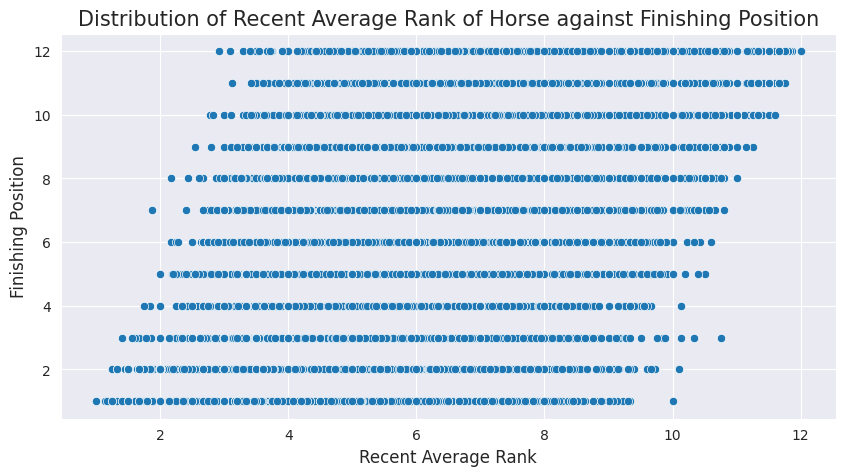

In [30]:
# Plot the recent average rank of each horse against finishing position
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['recent_ave_rank'], y=df['finishing_position'])
plt.xlabel('Recent Average Rank', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.title('Distribution of Recent Average Rank of Horse against Finishing Position', fontsize=15)